# DataStream Class

The `DataStream` class is a holder and merger of data timeseries and metadata. It is the building block of the `DataLake` class which is what you will mainly be interested in. This walkthrough will show you how to use the `DataStream` class to load data from a file and calculate time averages.


```python
class DataStream():
    
    """A class for calculating time averages of data streams on-the-fly.

    Parameters:
    ----------
        header_list (list of str): A list of column headers for the data.
        average_times (list of float): A list of time intervals (in seconds)
            over which to calculate the data averages.
        average_base (float, optional): The base for the exponential moving
            average window used to smooth the data. Defaults to 2.0.

    Example:
    ----------
        # Create a DataStream object with two headers and two average intervals
        stream = DataStream(['time', 'value'], [10.0, 60.0])

        # Add data to the stream and calculate the rolling averages
        for data_point in my_data_stream:
            stream.add_data_point(data_point)
            rolling_averages = stream.calculate_averages()

    Attributes:
    ----------
        header_list (list of str): (n,) A list of column headers for the data.
        header_dict (dict): A dictionary mapping column headers to column
            indices.
        average_int_sec (list of float): A list of time intervals (in seconds)
            over which to calculate the data averages.
        data_stream (np.ndarray): (n, m) An array of data points.
            Rows match header indexes and columns match time.
        time_stream (np.ndarray): (m,) An array of timestamps corresponding
            to the data points.
        average_base_sec (float): The base for the exponential moving average
            window used to smooth the data.
        average_base_time (np.ndarray): An array of timestamps corresponding to
            the beginning of each average interval.
        average_base_data (np.ndarray): An array of average data values for
            each average interval.
        average_base_data_std (np.ndarray): An array of standard deviations of
            the data values for each average interval.
        average_epoch_start (int or None): The Unix epoch time (in seconds) of
            the start of the first average interval.
        average_epoch_end (int or None): The Unix epoch time (in seconds) of
            the end of the last average interval.
        average_dict (dict): A dictionary mapping average interval lengths to
            corresponding arrays of average data values.
    """
```

## Import the packages

In [1]:

import numpy as np
from matplotlib import pyplot as plt, dates
import os
from datetime import datetime

from datacula.lake.datastream import DataStream
from datacula import loader

# preferred settings for plotting
plt.rcParams.update({'text.color': "#333333",
                     'axes.labelcolor': "#333333",
                     "figure.figsize": (6,4),
                     "font.size": 14,
                     "axes.edgecolor": "#333333",
                     "axes.labelcolor": "#333333",
                     "xtick.color": "#333333",
                     "ytick.color": "#333333",
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

## Settings dictionary

This dictionary, `settings_cpc`, contains configuration settings for a specific instrument called "CPC_3010". The settings are used for data processing, loading, and organization. Let's go through each key-value pair in the dictionary:

- "instrument_name": "CPC_3010": The name of the instrument, which is "CPC_3010" in this case.
- "data_stream_name": "CPC_3010": The name of the data stream associated with the instrument, also "CPC_3010" here.
- "data_loading_function": "general_load": The name of the function that will be used to load the data. In this case, it's a general loading function called "general_load".
- "relative_data_folder": "CPC_3010_data": The name of the folder where the data files for this instrument are stored, relative to the main data directory.
- "skipRowsDict": 0: The number of rows to skip at the beginning of the file while reading the data. In this case, no rows are skipped.
- "Time_shift_to_Linux_Epoch_sec": 0: The time shift (in seconds) to convert the timestamps in the data to Unix/Linux epoch time. No time shift is applied here.
- "data_checks": This dictionary contains data validation settings:
- "characters": [20,35]: The range of valid line lengths (in characters) for each row in the data file.
- "char_counts": {",": 4, "/": 0, ":": 0}: The expected number of occurrences of specific characters in each row of the data file. In this case, 4 commas are expected, while no forward slashes or colons should be present. This is general, more character-specific checks can be added to the dictionary.
- "skip_rows": 1: The number of rows to skip at the beginning of the file for data validation.
- "skip_end": 0: The number of rows to skip at the end of the file for data validation.
- "data_header": ["CPC_count[#/sec]", "Temp_[C]"]: The list of data column headers in the file.
- "data_column": [1, 2]: The indices of the data columns in the file.
- "time_column": 0: The index of the time column in the file.
- "time_format": "epoch": The format of the time values in the file. In this case, it's Unix/Linux epoch time.
- "filename_regex": "CPC_3010*.csv": The regular expression pattern to match the data file names for this instrument.
- "base_interval_sec": 2: The base time interval (in seconds) for the data.
- "data_delimiter": ",": The delimiter used to separate the data values in the file, which is a comma in this case.

The `settings_cpc` dictionary is a useful way to store all the necessary settings and configurations for a particular instrument or data stream. These settings can be used by various functions and methods to process and analyze the data accordingly.

In [2]:
settings_cpc = {
        "instrument_name": "CPC_3010",
        "data_stream_name": "CPC_3010",
        "data_loading_function": "general_load",
        "relative_data_folder": "CPC_3010_data",
        "skipRowsDict": 0,
        "Time_shift_to_Linux_Epoch_sec": 0,
        "data_checks": {
            "characters": [20,35],
            "char_counts": {",": 4, "/": 0, ":": 0},
            "skip_rows": 1,
            "skip_end": 0
        },
        "data_header": ["CPC_count[#/sec]", "Temp_[C]"],
        "data_column": [1,2],
        "time_column": 0,
        "time_format": "epoch",
        "filename_regex": "CPC_3010*.csv",
        "base_interval_sec": 2,
        "data_delimiter": ","
    }

## Path

Set the working path where the data is stored. For now we'll use the provided example data in this current directory.

But the path could be any where on your computer. For example, if you have a folder called "data" in your home directory, you could set the path to: `path = "U:\\data\\processing\\Campgain2023_of_aswsome\\data\\"`

In [3]:
# set the parent directory of the data folder, for now this is the same as the current working directory
# but this can be a completely different path

path = os.getcwd()


## Load the data

With the working directory set, we can now load the data. For this we use the `loader` module and call loader.data_raw_loader() with the file path as argument.


In [ ]:

data_file = os.path.join(path, 'data', settings_cpc['relative_data_folder'], 'CPC_3010_data_20220701_Jul.csv')

print(data_file)

# load the data
raw_data = loader.data_raw_loader(data_file)

# print the first 2 rows
print(raw_data[:2])

## Clean up the data

Now we can apply some data checks that we defined in the settings dictionary. For this we use `loader.data_format_checks` and then we can convert that list of strings to a numpy array.

To do that next step we call `loader.sample_data()` with inputs from the settings dictionary and the data list we just cleaned up.

In [6]:
# This is done by the general_data_formatter function for timeseries data
# 2d data is a separate function

data = loader.data_format_checks(raw_data, settings_cpc['data_checks'])

# Sample the data to get the epoch times and the data
epoch_time, data_array = loader.sample_data(
    data=data,
    time_column=settings_cpc['time_column'],
    time_format=settings_cpc['time_format'],
    data_columns=settings_cpc['data_column'],
    delimiter=settings_cpc['data_delimiter'],
    date_offset=None,
    seconds_shift=settings_cpc['Time_shift_to_Linux_Epoch_sec'],
)

print(f"epoch_time: {epoch_time.shape}")
print(epoch_time[:5])
print(f"data_array: {data_array.shape}")
print(data_array[:5])

epoch_time: (24617,)
[1.65665160e+09 1.65665160e+09 1.65665161e+09 1.65665161e+09
 1.65665161e+09]
data_array: (24617, 2)
[[1.7870e+04 1.6900e+01]
 [1.8387e+04 1.7000e+01]
 [1.8855e+04 1.6900e+01]
 [1.8942e+04 1.7000e+01]
 [1.8705e+04 1.7200e+01]]


C:\Users\kkgor\OneDrive\Areas\GitHub\datacula\datacula\loader.py:150: UserWarning: More than 0.5 of the rows have been filtered out based on the characters limit [20, 35] or skip rows.
  warnings.warn(


In [6]:
epoch_time, data = loader.general_data_formatter(
    data=raw_data,
    data_checks=settings_cpc['data_checks'],
    data_column=settings_cpc['data_column'],
    time_column=settings_cpc['time_column'],
    time_format=settings_cpc['time_format'],
    delimiter=settings_cpc['data_delimiter'],
    date_offset=None,
    seconds_shift=settings_cpc['Time_shift_to_Linux_Epoch_sec']
)

# Transpose the data
# data = data.T

In [7]:
# Initialize the datastream object
cpc_datastream = DataStream(
                    header_list=settings_cpc['data_header'],
                    average_times=[600],
                    average_base=settings_cpc['base_interval_sec']
                )

In [8]:
# first transpose the data
data = data.T

cpc_datastream.add_data(
            time_stream=epoch_time,
            data_stream=data,
        )

In [9]:
# what do we have in the datastream?
print(cpc_datastream.return_header_list())

['CPC_count[#/sec]', 'Temp_[C]']


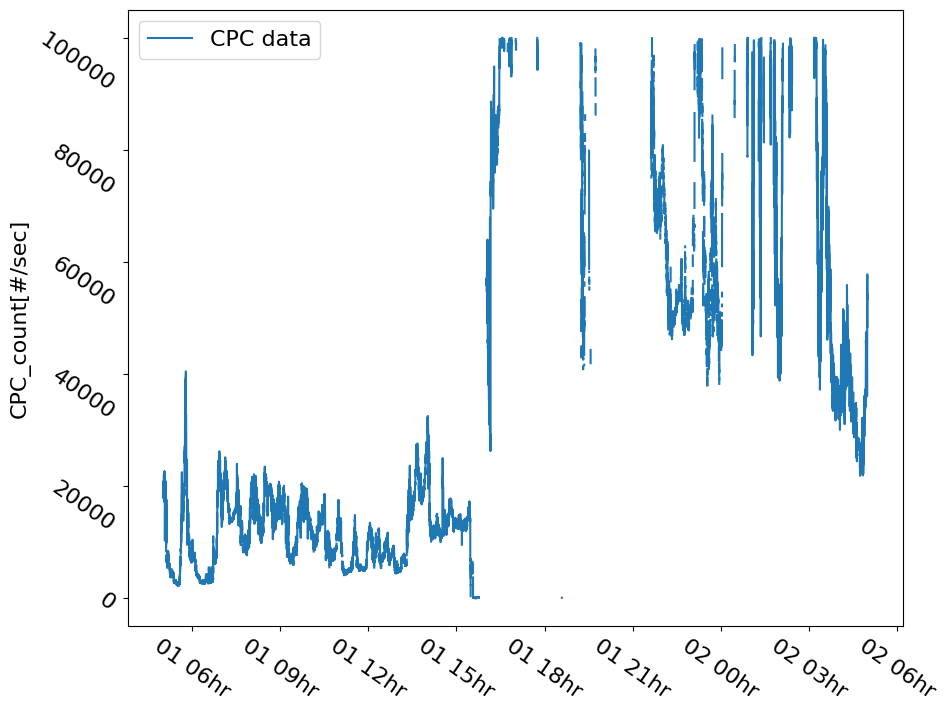

In [10]:
fig, ax = plt.subplots()
ax.plot(
    cpc_datastream.return_time(datetime64=True),
    cpc_datastream.return_data(keys=['CPC_count[#/sec]'])[0],
    label='CPC data'
)
plt.tick_params(rotation=-35)
ax.set_ylabel('CPC_count[#/sec]')
ax.xaxis.set_major_formatter(dates.DateFormatter('%d %Hhr'))
ax.legend()

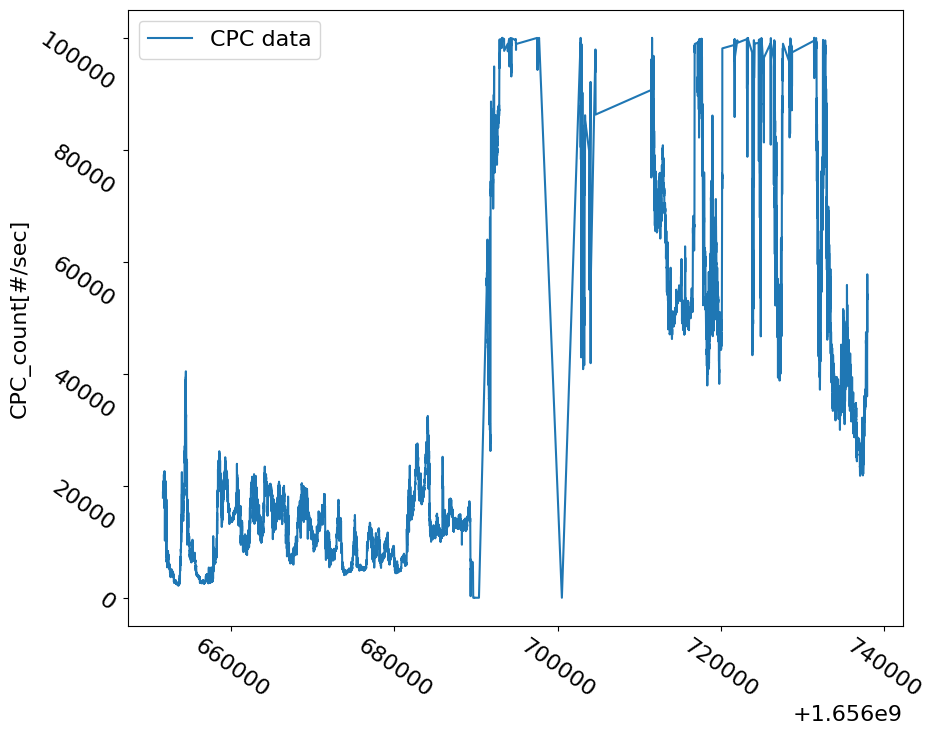

In [11]:
fig, ax = plt.subplots()
ax.plot(
    cpc_datastream.return_time(datetime64=False, raw=True),
    cpc_datastream.return_data(keys=['CPC_count[#/sec]'], raw=True)[0],
    label='CPC data'
)
plt.tick_params(rotation=-35)
ax.set_ylabel('CPC_count[#/sec]')
ax.legend()

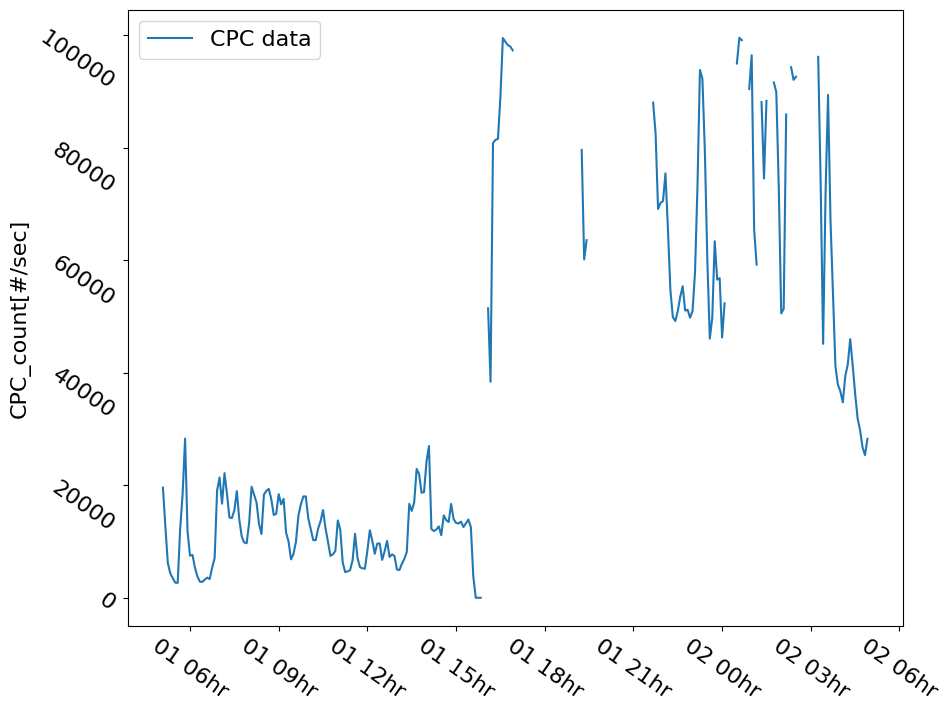

In [12]:
average_long = 300  # 5 min

cpc_datastream.reaverage_data(reaverage_base_sec=average_long)

fig, ax = plt.subplots()
ax.plot(
    cpc_datastream.return_time(datetime64=True),
    cpc_datastream.return_data(keys=['CPC_count[#/sec]'])[0],
    label='CPC data'
)
plt.tick_params(rotation=-35)
ax.set_ylabel('CPC_count[#/sec]')
ax.xaxis.set_major_formatter(dates.DateFormatter('%d %Hhr'))
ax.legend()

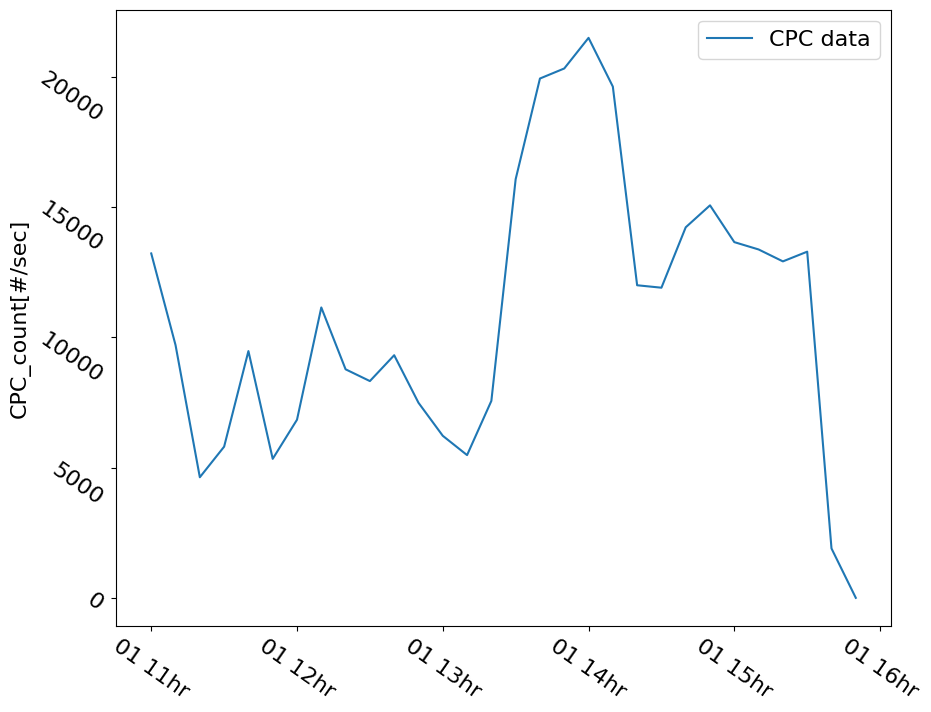

In [13]:
start = datetime.fromisoformat('2022-07-01T11:00:00').timestamp()-6*3600 # UTC shift
end = datetime.fromisoformat('2022-07-01T16:00:00').timestamp()-6*3600 # UTC shift

average_long = 600  # 5 min

cpc_datastream.reaverage_data(
    reaverage_base_sec=average_long,
    epoch_start=start,
    epoch_end=end
)

fig, ax = plt.subplots()
ax.plot(
    cpc_datastream.return_time(datetime64=True),
    cpc_datastream.return_data(keys=['CPC_count[#/sec]'])[0],
    label='CPC data'
)
plt.tick_params(rotation=-35)
ax.set_ylabel('CPC_count[#/sec]')
ax.xaxis.set_major_formatter(dates.DateFormatter('%d %Hhr'))
ax.legend()